Problem 7: User defined function

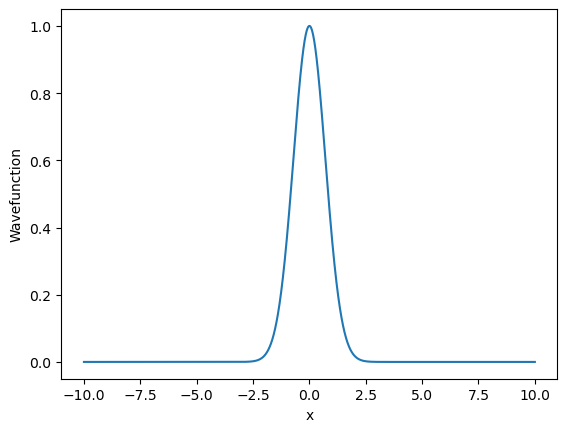

PyObject Text(24.000000000000007, 0.5, 'Wavefunction')

In [10]:
using PyPlot
function wavefunction(x)           #User defined wavefunction
    return exp(-x^2)
end
x=collect(-10:0.001:10)            #Domain of x
wf=wavefunction.(x)
p =plot(x,wf)                      #Plot for wavefunction
xlabel("x")
ylabel("Wavefunction")


Problem 8: Integration

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000001802AD66050>

1.7724538509055159

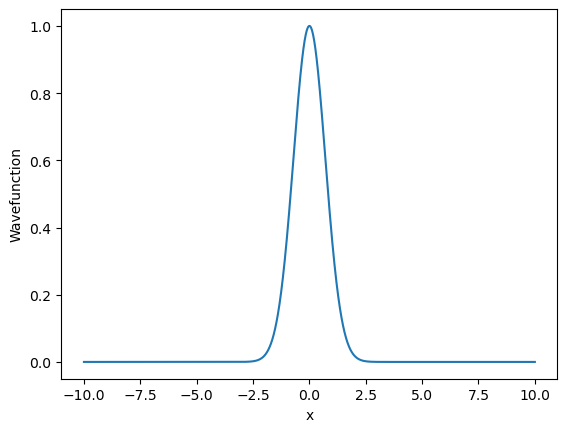

In [11]:
include("initial_data.jl")
function integrate(f,a,b)          #Simpson integration for vector function
    n=length(f)-1
    h=(b-a)/n
    I= h/3*(f[1]+2*sum(f[3:2:end-2])+4*sum(f[2:2:end])+f[end])
    return I
end

iwf=integrate(wf,-10,10)            #Integration of the wavefunction
println(iwf)

Problem 9: Coefficients

In [12]:
using LinearAlgebra
function coefficients(r)                      #Gives coefficients upto r value
    M=zeros(r,r+1)
    for k in 1:r
        mat=zeros(k,k)
        for i in 1:k
            for j in 1:k
                mat[i,j]=2*i^(2*j)/factorial(big(2*j))
            end
        end
        Inv=inv(mat)[k,1:end]
        M[k,1]=-2*sum(inv(mat)[1,1:end])
        M[k,2:k+1]=inv(mat)[1,1:end]
    end
    return M
end

C=coefficients(7)

7×8 Matrix{Float64}:
 -2.0      1.0       0.0        0.0        …   0.0          0.0
 -2.5      1.33333  -0.0833333  0.0            0.0          0.0
 -2.72222  1.5      -0.15       0.0111111      0.0          0.0
 -2.84722  1.6      -0.2        0.0253968      0.0          0.0
 -2.92722  1.66667  -0.238095   0.0396825      0.0          0.0
 -2.98278  1.71429  -0.267857   0.0529101  …  -6.01251e-5   0.0
 -3.02359  1.75     -0.291667   0.0648148     -0.000226625  1.18929e-5